In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from graphviz import Digraph
from matplotlib import mlab
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [4]:
voice = pd.read_csv("data/processed/woman_voice.csv")

In [5]:
voice.columns

Index(['created_at_day', 'number', 'eiindex', 'elite_response'], dtype='object')

In [6]:
number = voice['number'] 
normalized_number = scipy.stats.zscore(number)
normalized_number

0    -0.415588
1    -0.501589
2    -0.376221
3    -0.185444
4    -0.357446
5    -0.495532
6    -0.238135
7    -0.368953
8    -0.414376
9    -0.732339
10   -0.528843
11   -0.255093
12   -0.303544
13   -0.951581
14   -0.992159
15   -0.897679
16   -0.603337
17   -0.944919
18   -0.819551
19   -0.275079
20    2.074207
21    3.110461
22    1.747160
23    2.172927
24    0.703639
25    0.453509
26   -0.433151
27   -0.695394
28    0.273027
29    0.561313
30    0.689709
Name: number, dtype: float64

In [9]:
ei = voice['eiindex'] 
normalized_ei = scipy.stats.zscore(eiindex)

elite_response = voice['elite_response'] 
normalized_elite_response = scipy.stats.zscore(elite_response)

In [10]:
cols = ['elite_response', 'eiindex', 'number']
df = pd.DataFrame(list(zip(normalized_elite_response, normalized_ei, normalized_number)), columns=cols)

In [11]:
df

,elite_response,eiindex,number
0,-0.497566,-1.469533,-0.415588
1,-0.422871,-0.271597,-0.501589
2,-0.385523,0.728564,-0.376221
3,-0.422871,0.243734,-0.185444
4,-0.534913,-1.191365,-0.357446
5,-0.534913,-1.089297,-0.495532
6,-0.460218,-0.972592,-0.238135
7,-0.422871,-0.620999,-0.368953
8,-0.198785,0.832343,-0.414376
9,-0.422871,0.365259,-0.732339


<AxesSubplot:>

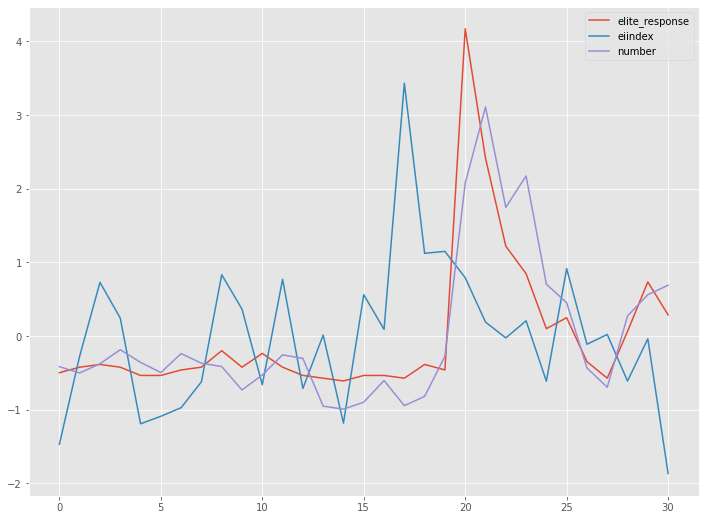

In [12]:
df.plot()

In [13]:
df_std = stats.zscore(df)
df_std

,elite_response,eiindex,number
0,-0.497566,-1.469533,-0.415588
1,-0.422871,-0.271597,-0.501589
2,-0.385523,0.728564,-0.376221
3,-0.422871,0.243734,-0.185444
4,-0.534913,-1.191365,-0.357446
5,-0.534913,-1.089297,-0.495532
6,-0.460218,-0.972592,-0.238135
7,-0.422871,-0.620999,-0.368953
8,-0.198785,0.832343,-0.414376
9,-0.422871,0.365259,-0.732339


In [14]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from matplotlib import mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [16]:
# Augmented Dickey-Fuller 単位根検定（帰無仮説：単位根がある）
ct_results = adfuller(df_std['elite_response'],regression='ct')  #対立仮説：定数項＋トレンド＋定常過程
c_results = adfuller(df_std['elite_response'],regression='c')    #対立仮説：定数項＋定常過程
n_results = adfuller(df_std['elite_response'],regression='nc')    #対立仮説：定常過程（定数項なし）
# p値
print(ct_results[1])
print(c_results[1])
print(n_results[1])

0.09683557221983857
0.044137374046981565
0.003003568054821254


In [17]:
# Augmented Dickey-Fuller 単位根検定（帰無仮説：単位根がある）
ct_results = adfuller(df_std['eiindex'],regression='ct')  #対立仮説：定数項＋トレンド＋定常過程
c_results = adfuller(df_std['eiindex'],regression='c')    #対立仮説：定数項＋定常過程
n_results = adfuller(df_std['eiindex'],regression='nc')    #対立仮説：定常過程（定数項なし）
# p値
print(ct_results[1])
print(c_results[1])
print(n_results[1])

0.558749995045058
0.16530863119447148
0.017297205692805045


In [18]:
# Augmented Dickey-Fuller 単位根検定（帰無仮説：単位根がある）
ct_results = adfuller(df_std['number'],regression='ct')  #対立仮説：定数項＋トレンド＋定常過程
c_results = adfuller(df_std['number'],regression='c')    #対立仮説：定数項＋定常過程
n_results = adfuller(df_std['number'],regression='nc')    #対立仮説：定常過程（定数項なし）
# p値
print(ct_results[1])
print(c_results[1])
print(n_results[1])

0.27288365970220396
0.35013019645920884
0.054884187894298046


In [22]:
# データフレームを配列へ変換
x = df.to_numpy()
# 最大のラグ数
maxlags = 3
# モデルのインスタンス生成
model = VAR(x)
# 最適なラグの探索
lag = model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['aic'],'\n')
# モデルの学習
results = model.fit(lag['aic'])
print(results.summary())

最適なラグ： 3 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Nov, 2022
Time:                     14:22:48
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.22758
Nobs:                     28.0000    HQIC:                  -2.21858
Log likelihood:          -52.0217    FPE:                  0.0776025
AIC:                     -2.65494    Det(Omega_mle):       0.0310455
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.050543         0.134389           -0.376           0.707
L1.y1        -0.143862         0.345020           -0.417           0.677
L1.y2         0.019191         0.152006            0.126           0.900
L1.y3      

In [23]:
# Eiindex -> Elite response の因果を検定
test_results = results.test_causality(causing=1, caused=0)  
test_results.pvalue #p値

0.00044435222281185476

In [24]:
# Eiindex -> Number の因果を検定
test_results = results.test_causality(causing=1, caused=2)  
test_results.pvalue #p値

0.0013155727549036876

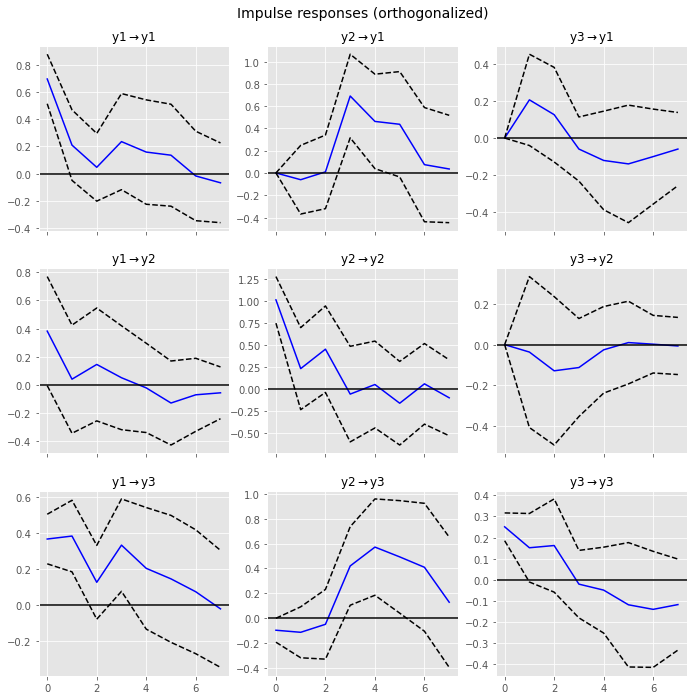

In [25]:
# (直行化)インパルス応答関数
period = 7
irf = results.irf(period)
irf.plot(orth=True)
plt.show()

In [98]:
# 'elite_response', 'ei', 'unity', 'number','commitment'

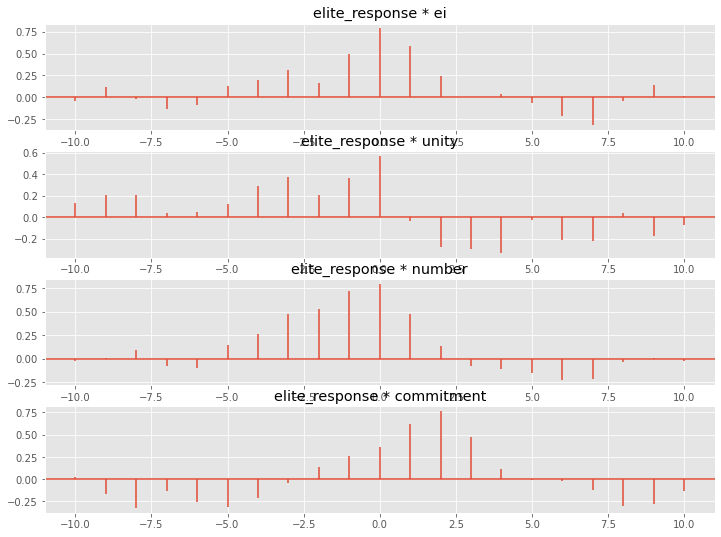

In [102]:
fig, ax = plt.subplots(4,1)
# Elite response と EI の相互相関
ax[0].xcorr(df_std.iloc[:,0], df_std.iloc[:,1])
ax[0].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[1]))

# Elite response と Unity の相互相関
ax[1].xcorr(df_std.iloc[:,0], df_std.iloc[:,2])
ax[1].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[2]))

# Elite response と Number の相互相関
ax[2].xcorr(df_std.iloc[:,0], df_std.iloc[:,3])
ax[2].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[3]))

# Elite response と Commitment の相互相関
ax[3].xcorr(df_std.iloc[:,0], df_std.iloc[:,4])
ax[3].title.set_text(str(df_std.columns[0]+' * '+df_std.columns[4]))


In [87]:
#Elite response とCommitmentのラグ2の相関が最大、つまりElite responsと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→Elite responseと考えられます。

In [ ]:
# 'elite_response', 'ei', 'unity', 'number','commitment'

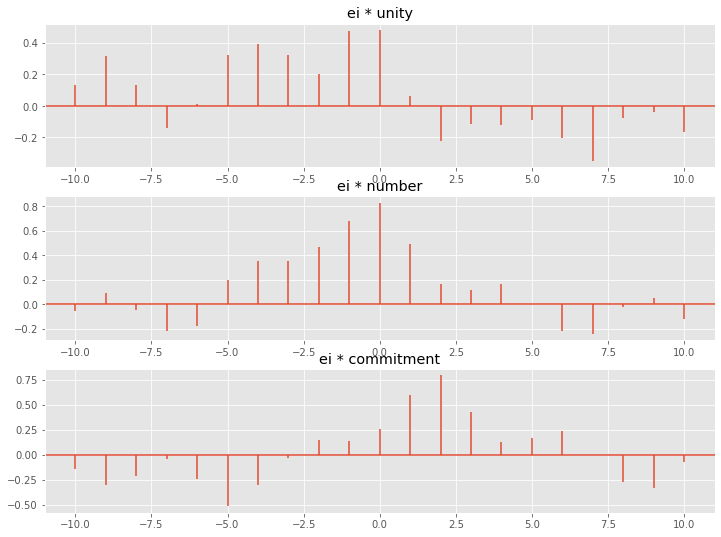

In [103]:
fig, ax = plt.subplots(3,1)
# EI と unity の相互相関
ax[0].xcorr(df_std.iloc[:,1], df_std.iloc[:,2])
ax[0].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[2]))

# EI と Number の相互相関
ax[1].xcorr(df_std.iloc[:,1], df_std.iloc[:,3])
ax[1].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[3]))

# EI と Commitment の相互相関
ax[2].xcorr(df_std.iloc[:,1], df_std.iloc[:,4])
ax[2].title.set_text(str(df_std.columns[1]+' * '+df_std.columns[4]))


In [ ]:
#EI とCommitmentのラグ2の相関が最大、つまりEIと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→EIと考えられます。

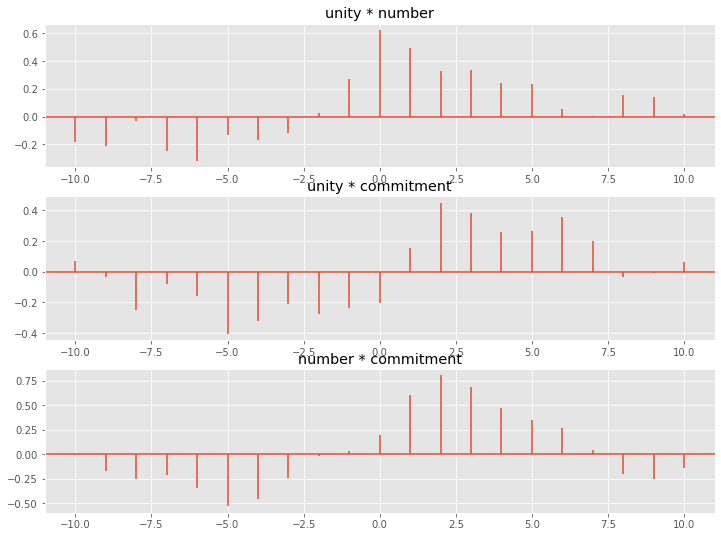

In [104]:
fig, ax = plt.subplots(3,1)
# Unity と Number の相互相関
ax[0].xcorr(df_std.iloc[:,2], df_std.iloc[:,3])
ax[0].title.set_text(str(df_std.columns[2]+' * '+df_std.columns[3]))

# Unity と Commitment の相互相関
ax[1].xcorr(df_std.iloc[:,2], df_std.iloc[:,4])
ax[1].title.set_text(str(df_std.columns[2]+' * '+df_std.columns[4]))

# Commitment と　Number の相互相関
ax[2].xcorr(df_std.iloc[:,3], df_std.iloc[:,4])
ax[2].title.set_text(str(df_std.columns[3]+' * '+df_std.columns[4]))


In [ ]:
#Unity とCommitmentのラグ2の相関が最大、つまりEIと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→Unityと考えられます。

#Number とCommitmentのラグ2の相関が最大、つまりEIと2日前のCommitmentの相関が最大になっています。

#2つの変量を持つ時系列データで、系列Aよりも系列Bが少し遅れて変化するような関係がある場合、系列Aは系列Bの先行指標であるといいます。

#グレンジャー因果性の考え方からすると、Commitment→Numberと考えられます。